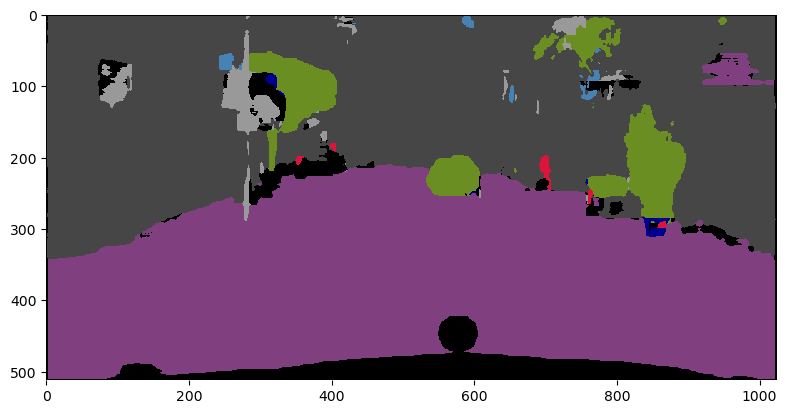

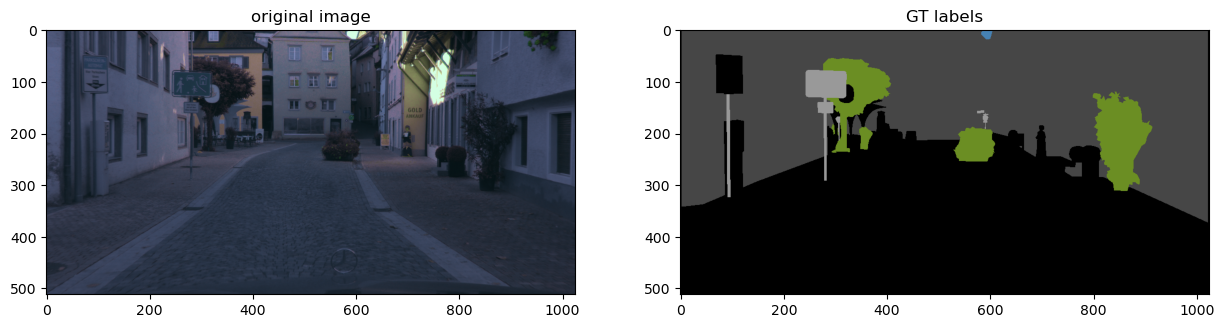

In [126]:
from pathlib import Path
import glob
import pandas as pd
import albumentations as A
import torch
from pa228_tools import show_seg_sample, plot_seg_result, ishow, plot_pred
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split
from dataset import SampleDataset

PATH = Path('{}'.format('data_test'))
city = 'lindau'
img_dir = PATH / 'img/{}'.format(city)
mask_dir = PATH / 'mask/{}'.format(city) 
img_files = sorted(glob.glob("{}/*.png".format(img_dir))) # /*/*
mask_files = sorted(glob.glob("{}/*.png".format(mask_dir)))
df = pd.DataFrame({'img': img_files, 'mask': mask_files})

transforms = A.Compose([
                        A.Normalize(mean=(0.3210, 0.2343, 0.2740), std=(0.1852, 0.1621, 0.1804)),
                        ToTensorV2(),
                        ]   
                    )

train_df, valid_df = train_test_split(df, test_size=.3, random_state=2)
# train_df, test_df = train_test_split(df, test_size=.1, random_state=1)

traindataset = SampleDataset(train_df, transforms=transforms)
valdataset = SampleDataset(valid_df, transforms=transforms)

device = torch.device('cpu')
model = torch.load('model.pt', map_location=device)

IDX = 8
sample = traindataset[IDX]
x, y = sample
pred2 = model(x.unsqueeze(0))
p = plot_pred(pred2, y)
ishow(p)
show_seg_sample(sample)

# new normalization, no augmentation 40 epochs - 0.98
# new normalization, flip/gaus blurr augmentation 20 epochs - 0.99

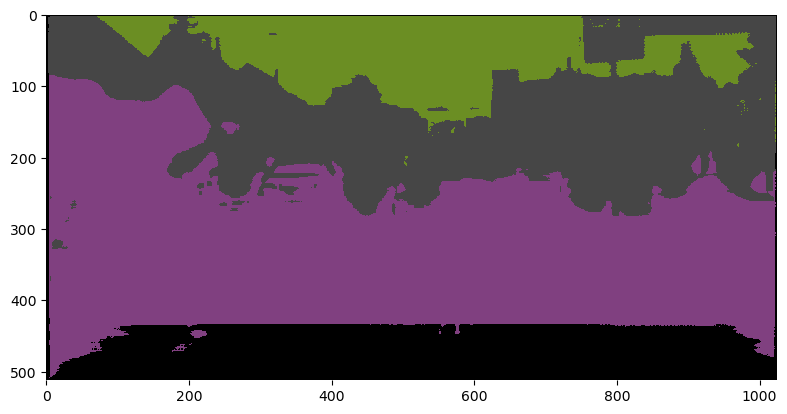

In [54]:


 

import torch.nn as nn
class SoftDiceLoss(nn.Module):
    def __init__(self):
        super(SoftDiceLoss, self).__init__()

    def forward(self, input, target):
        smooth = 1e-5

        input_flat = input.flatten(2).sigmoid()
        target_flat = target.flatten(2)
        
        intersection = torch.sum(input_flat * target_flat, dim=-1)
        union = input_flat.sum(dim=-1) + target_flat.sum(dim=-1)
        dice_coeff = (2. * intersection + smooth) / (union + smooth)
        
        return 1 - dice_coeff.mean()

# loss_fn = SoftDiceLoss()
# loss = loss_fn(pred2, y.unsqueeze(0))
# print(loss)
p = plot_pred(pred2, y.squeeze(0))
ishow(p)
# y.unique()
# filename = f"output_predictions/test.png"  # Adjust filename as needed
# io.imsave(filename, img_as_ubyte(pred.squeeze(0).detach().numpy()))